In [142]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [143]:


df = pd.read_csv('UNSW-all.csv')
df['label'] = df.label

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'label']
y = df.loc[:, 'label'].values

#df_train = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_training-set.csv')
#df_test = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_testing-set.csv')

In [147]:
df_train = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_training-set.csv')


In [148]:
X_train = df_train.loc[:, df_train.columns != 'label']
Y_train = df_train.loc[:, 'label'].values

In [152]:
X_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,Normal
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,Normal
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,Normal
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,Normal
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,24,13,24,0,0,0,24,24,0,Generic
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,3,13,0,0,0,3,12,0,Generic
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,30,14,30,0,0,0,30,30,0,Generic


In [154]:
df_test = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_testing-set.csv')


In [155]:
X_test = df_test.loc[:, df_test.columns != 'label']
Y_test = df_test.loc[:, 'label'].values

In [156]:
df_test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [157]:
#del X_train['Unnamed: 0']
#del X_test['Unnamed: 0']
#del X['Unnamed: 0']

In [158]:
del X_train['id']
del X_test['id']
#el X['id']

In [159]:
X_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,Generic
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,Generic
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,Generic


In [160]:
X_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [161]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
# Categorical boolean mask
categorical_feature_mask = X_train.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = X_train.columns[categorical_feature_mask].tolist()

In [163]:
categorical_feature_mask_test = X_test.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols_test = X_test.columns[categorical_feature_mask_test].tolist()

In [164]:
categorical_feature_mask

dur                  False
proto                 True
service               True
state                 True
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
is_ftp_login         False
c

In [165]:
categorical_cols

['proto', 'service', 'state', 'attack_cat']

In [166]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

In [167]:
# apply le on categorical feature columns
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))

X_train[categorical_cols].head(10)

/home/micha/anaconda3/envs/hackathon/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,proto,service,state,attack_cat
0,113,0,2,6
1,113,0,2,6
2,113,0,2,6
3,113,3,2,6
4,113,0,2,6
5,113,0,2,6
6,113,0,2,6
7,113,0,2,6
8,113,0,2,6
9,113,0,2,6


In [168]:
# apply le on categorical feature columns
X_test[categorical_cols_test] = X_test[categorical_cols_test].apply(lambda col: le.fit_transform(col))

X_test[categorical_cols_test].head(10)

/home/micha/anaconda3/envs/hackathon/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,proto,service,state,attack_cat
0,117,0,4,6
1,117,0,4,6
2,117,0,4,6
3,117,0,4,6
4,117,0,4,6
5,117,0,4,6
6,117,0,4,6
7,117,0,4,6
8,6,0,4,6
9,6,0,4,6


In [169]:
X_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,6
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,6
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,6
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,6
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,5
175337,0.505762,113,0,2,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,8
175338,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,5
175339,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,5


In [170]:
X_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,117,0,4,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,6
1,0.000008,117,0,4,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,6
2,0.000005,117,0,4,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,6
3,0.000006,117,0,4,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,6
4,0.000010,117,0,4,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,0,4,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,6
82328,1.106101,111,0,3,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,6
82329,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6
82330,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6


In [171]:
fn=X_train.dtypes==object
featureliste = []

In [172]:
for i in range(len(fn)):
    featureliste.append(fn.index[i])

In [173]:
featureliste

['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat']

In [174]:
# Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=200,random_state=10,criterion='gini', max_leaf_nodes=40, max_depth=10)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=40, n_estimators=200,
                       random_state=10)

In [175]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

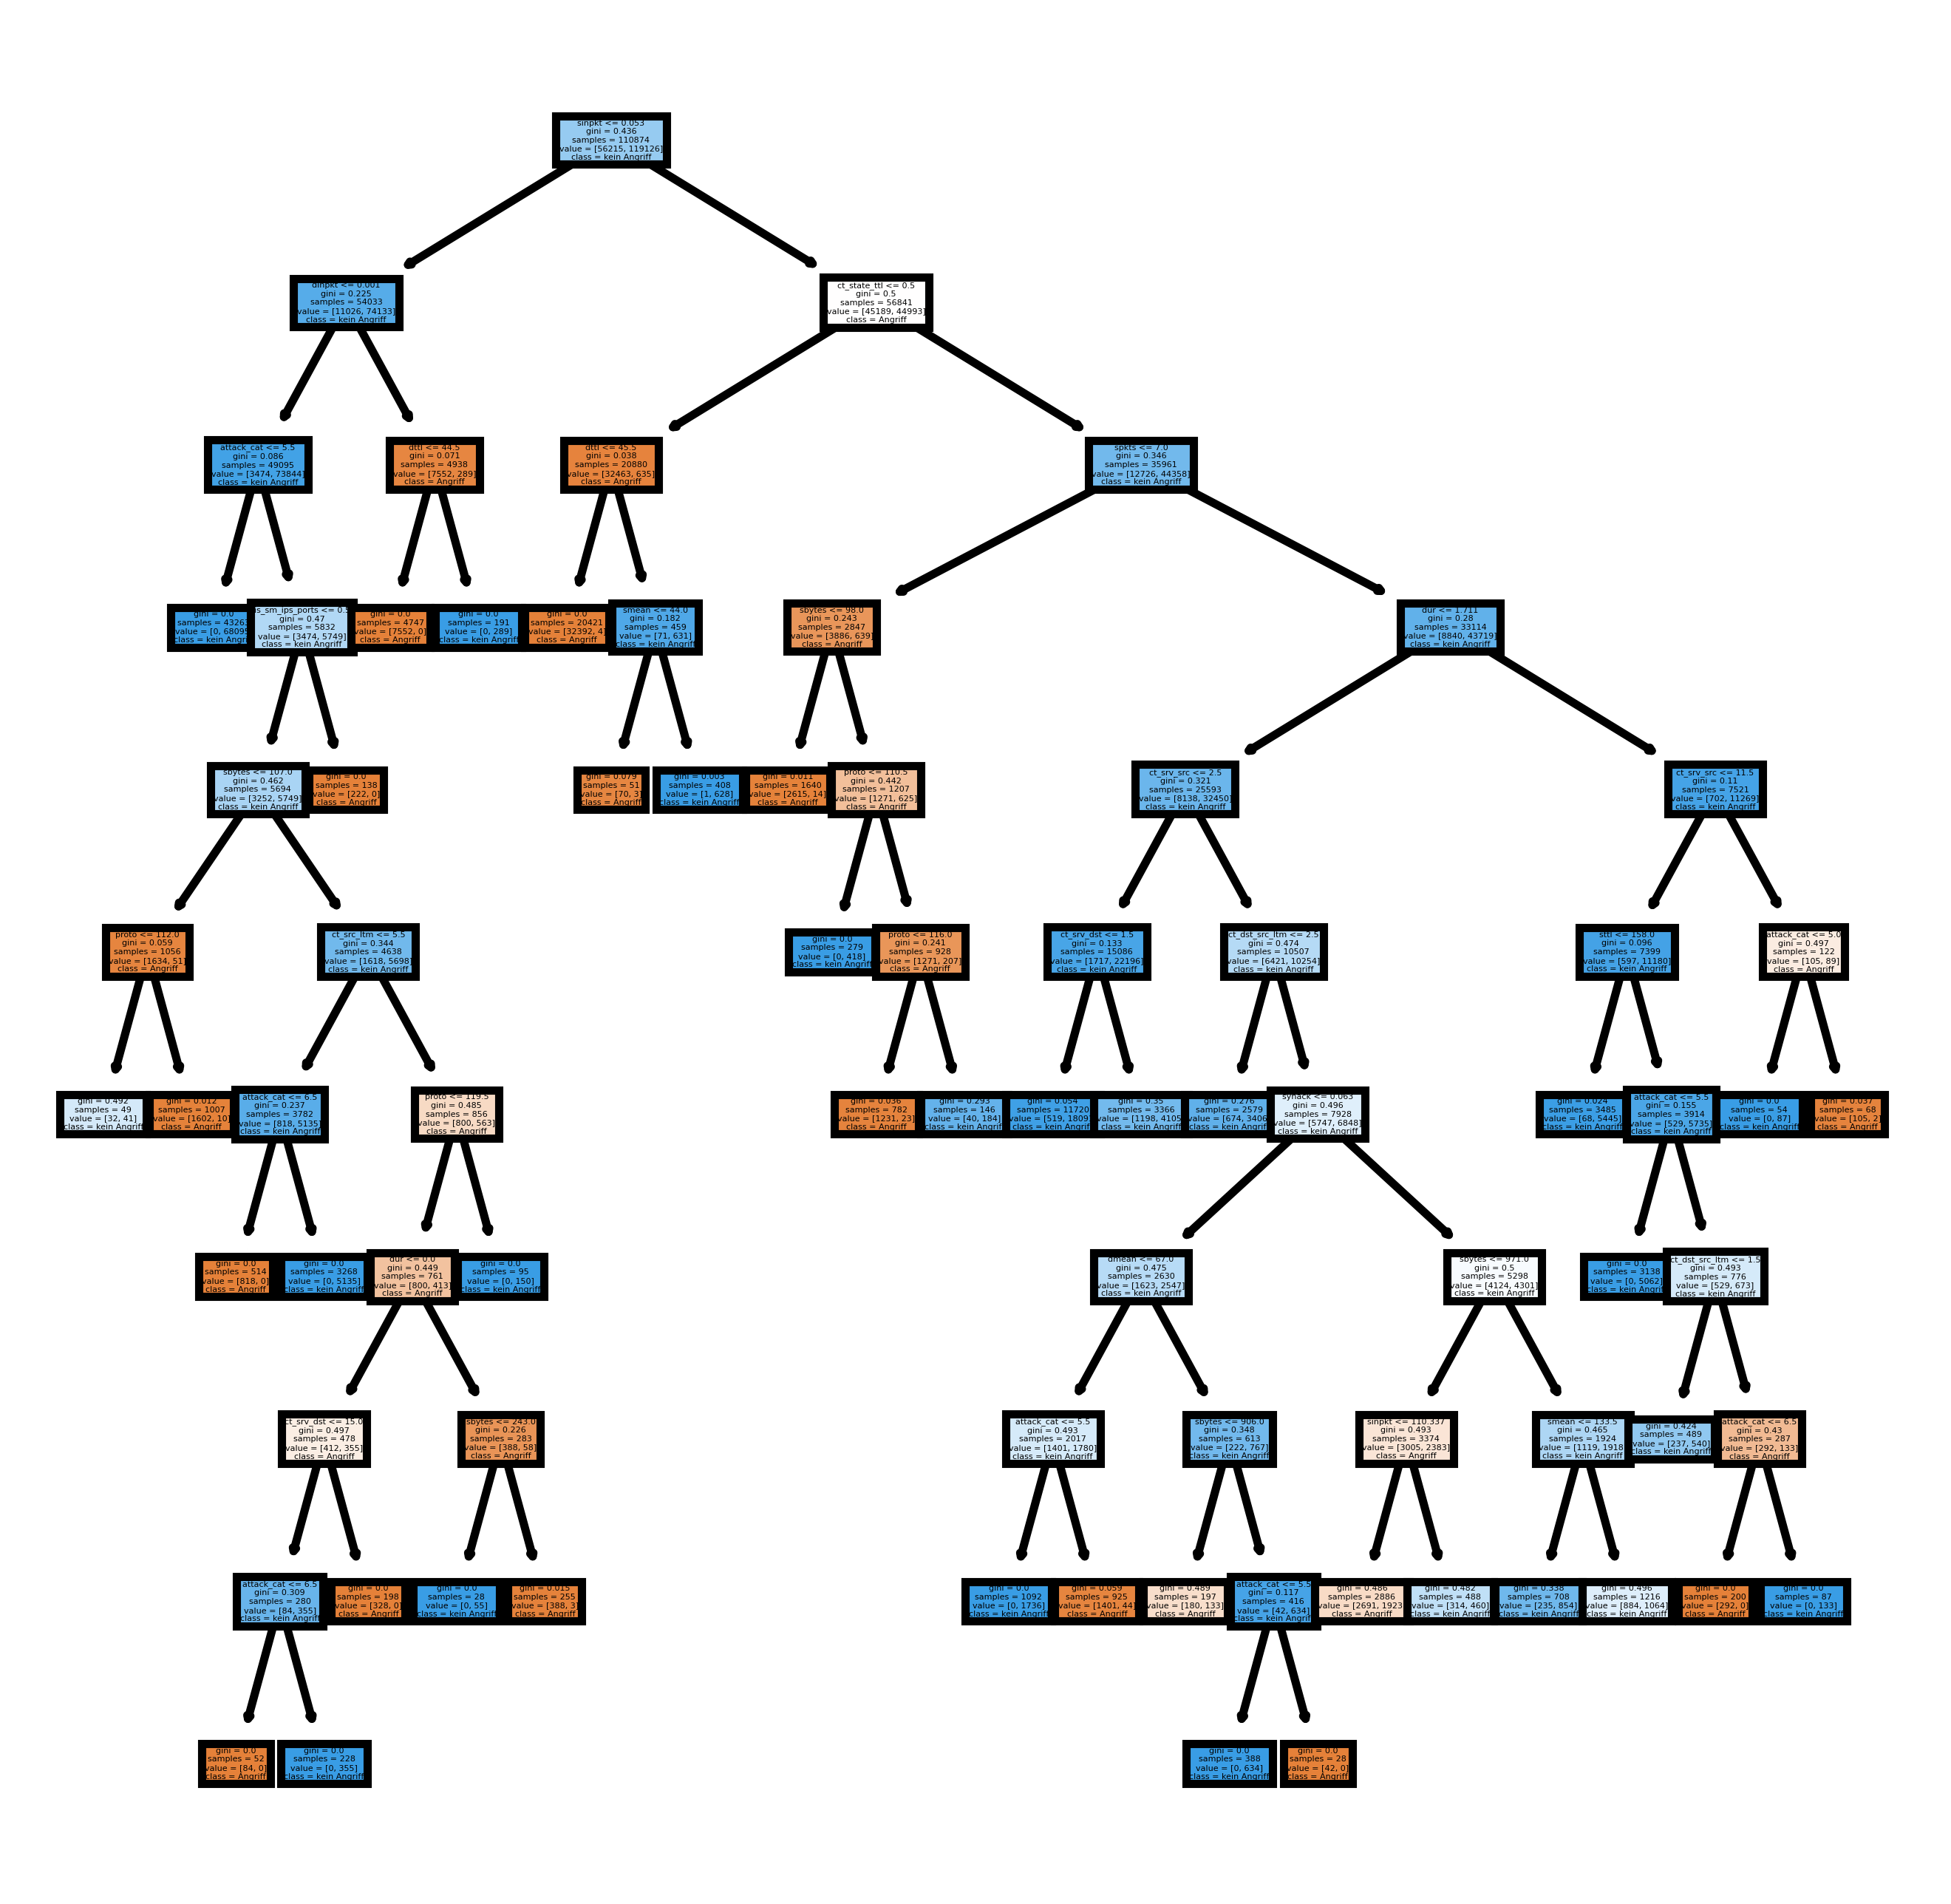

In [176]:
cn=['Angriff', 'kein Angriff']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = featureliste, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

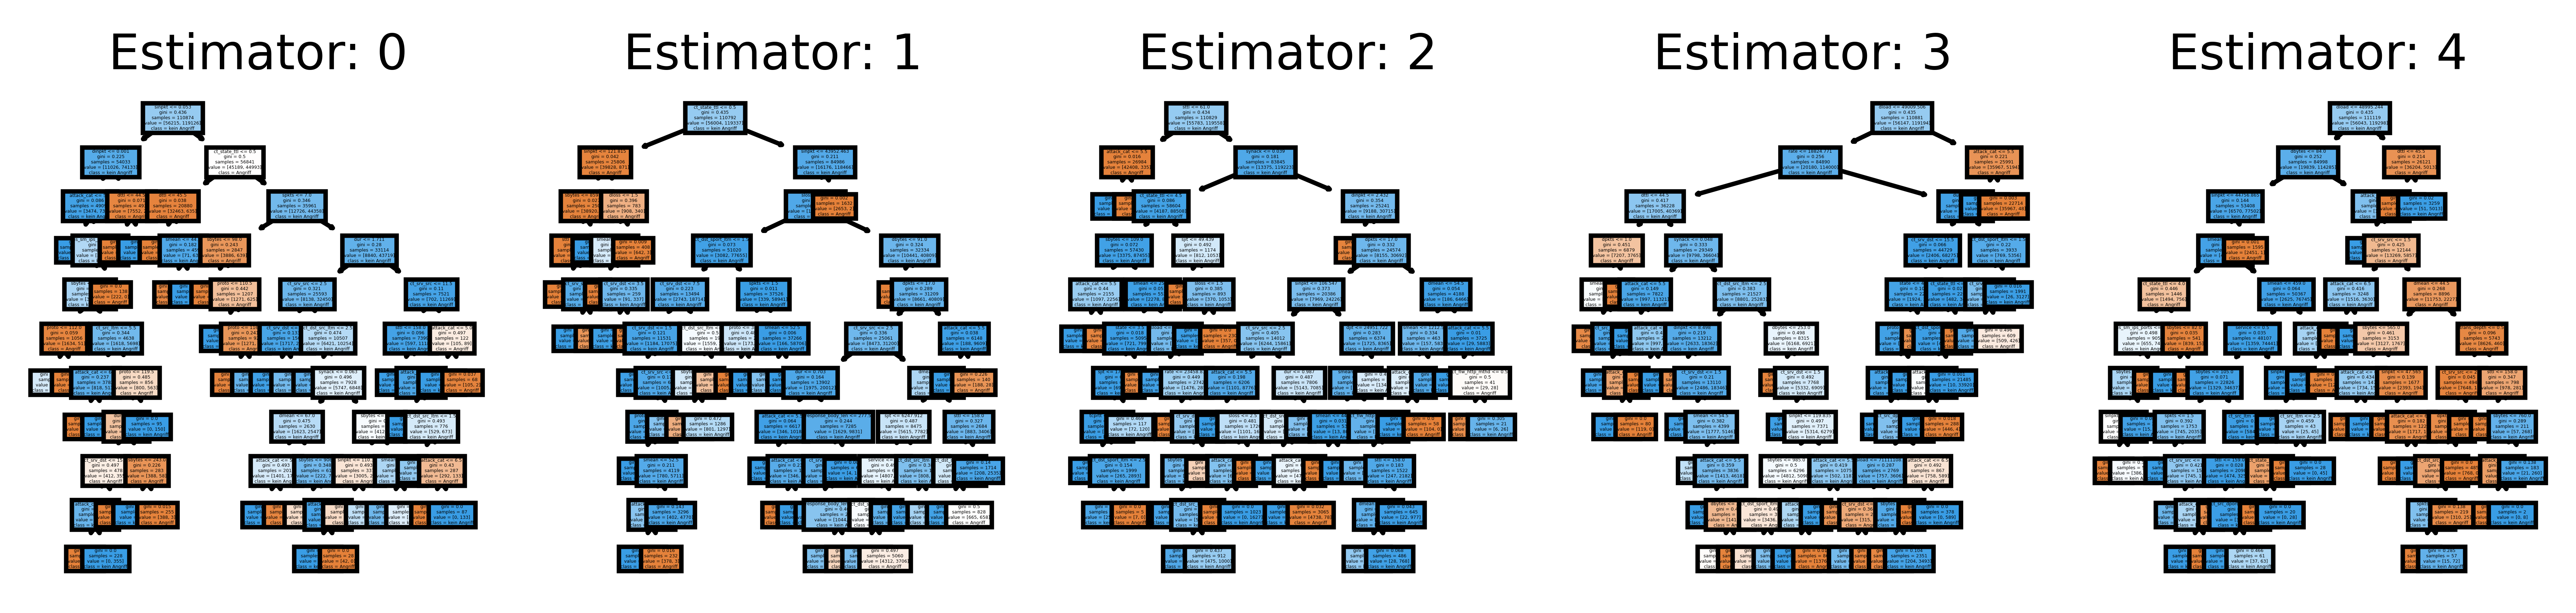

In [177]:
# This may not the best way to view each estimator as it is small

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = featureliste, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [178]:
from sklearn.metrics import plot_roc_curve

In [181]:
Y_test

array([0, 0, 0, ..., 0, 0, 0])

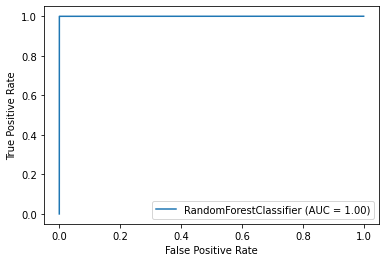

In [179]:
rf_disp = plot_roc_curve(rf, X_test, Y_test)
plt.show()

In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

exported_pipeline = XGBClassifier(learning_rate=0.01, max_depth=4, min_child_weight=12, n_estimators=100, nthread=1, subsample=0.35000000000000003)



In [183]:
X_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,117,0,4,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,6
1,0.000008,117,0,4,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,6
2,0.000005,117,0,4,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,6
3,0.000006,117,0,4,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,6
4,0.000010,117,0,4,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,0,4,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,6
82328,1.106101,111,0,3,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,6
82329,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6
82330,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6


In [184]:
X_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,6
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,6
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,6
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,6
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,5
175337,0.505762,113,0,2,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,8
175338,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,5
175339,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,5


In [186]:
exported_pipeline.fit(X_train, Y_train)
results = exported_pipeline.predict(X_test)

In [190]:
exported_pipeline.score(X_train, Y_train)

1.0

TypeError: 'NoneType' object is not callable